<a href="https://colab.research.google.com/github/samyshyaka/SamyShyaka/blob/main/Fall24_BusinessAnalytics_LogisticRegression_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Logistic regression is a clasification model that is very easy to implement but performs very well on linearly seperable classes. It is one of the most widely used algorithms for classification in the industry. Logistic regression is a linear model for **binary classification** that can be extended to multiclass classification as you will learn in the advanced Machine Learning courses.

To explain the idea behind the logistic regression as a probabilistic model, let's first introduce the **odds ratio**, which is the odds in favor of a particular event. The odds ration can be written as $\frac{p}{(1-p)}$, where $p$ stands for the probability of a positive event. Note that the term _positive event_ does not necessarily mean good, but refers to the event that we want to predict, for example, the probability that a patient has a certain disease; we can think of the positive event as the class label $y=1$. We can then further define the **logit** function, which is simply the logarithm of the odds ratio (log-odds):

$$logit(p)=log\frac{p}{(1-p)}$$

The logit function takes input values in the range $0$ to $1$ and transforms them to the values over the entire real number range, which we can use to express a linear relationship between feature values and the log-odds:

$$logit(p(y=1|x))=w_0x_0+w_1x_1+...+w_mx_m=w^Tx$$

where $p(y=1|x)$ is the conditional probability that a particular sample/instance belong to class $1$ given its features $X$.

Now that we are actually intersted in is predicting the probability that a certain sample belong to a particular class, which is the inverse form of the logit function. It is also called the *logistic* function, simetimes simply abbreciated as _sigmoid_ function due to its characteristic S-shape.

$$\phi(z)=\frac{1}{1+e^{-z}}=\frac{1}{1+e^{-(w_0x_0+w_1x_1+...+w_mx_m)}}$$

Now let's simply plot the sigmoid functuin for some values in the range $-8$ tp $8$ to see what it looks like:


# The Sigmoid Function

The following code visualizes the sigmoid function, which is commonly used in machine learning and logistic regression.

The output of this code is a visualization of the sigmoid function, showing how it maps input values z to values between 0 and 1, forming an S-shaped curve.






-8.0 0.0003353501304664781


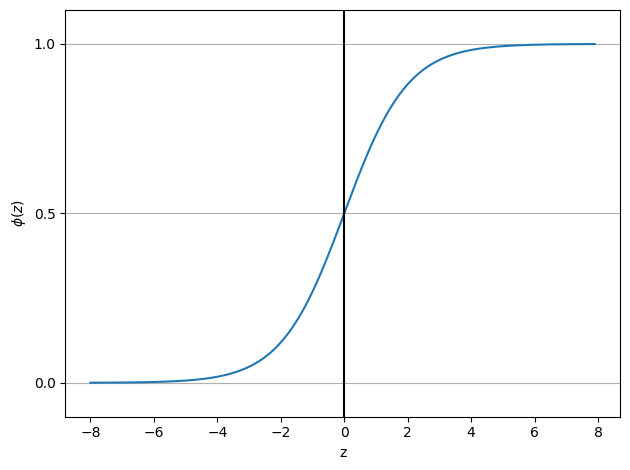

In [ ]:
#################################### Visualization of Sigmoid Function ####################################

# Import necessary libraries and modules
import matplotlib.pyplot as plt
import numpy as np

# Define Sigmoid Function
# The sigmoid function is a mathematical function that maps any real number z to a value between 0 and 1
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z)) # takes z as input and plugs it in the sigmoid function; returns that output value of the sigmoid function

# List of values and computation
# An array of values z is created using NumPy's arange function. These values range from -8 to 8 with a step size of 0.1
z = np.arange(-8, 8, 0.1) # return evenly spaced values within a given interval using the specified step

#  The sigmoid(z) function is then applied to these values, and the result is stored in the phi_z variable
phi_z = sigmoid(z)        # takes z as input and returns sigmoid of z
print(z[0],phi_z[0])      # see first elements of arrays

# Visualization parameters
# The code plots the sigmoid function using plt.plot(z, phi_z)
plt.plot(z, phi_z)          # specify what to plot
plt.axvline(0.0, color='k') # add a vertical line across the axes at 0
plt.ylim(-0.1, 1.1)         # set the y-limits of the current axes
plt.xlabel('z')             # set label of x axis
plt.ylabel('$\phi (z)$')    # set label of y axis

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0]) # add y ticks at 0, 0.5 and 1
ax = plt.gca()              # gca stands for get the current axis
ax.yaxis.grid(True)         # adds a gridline to the y-axis for better visualization.

plt.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()         # display the figure


We can see that $\phi(z)$ approaches 1 if $z$ goes towards infinity $(z \to \infty)$, since $e^{-z}$ becomes very small for large values of $z$. Similarly,  $\phi(z)$ goes towards 0 for $(z \to -\infty)$ as the result of an increasingly large denominator. Thus, we conclude that this sigmoid function takes real number values as input and transforms them to values in the range $[0,1]$ with an intercept at $\phi(z)=0.5$

The output of the sigmoid function is interpreted as the probability of particular sample belonging to class $1$  $\phi(z)=p(y=1 \mid x;w)$, given its features $x$ parameterized by the weights $w$. For example, if we compute $\phi(z)=0.8$ for a particular flower sample, it means that the chance that this sample is an Iris-Versicolor flower is $80\%$. Similarly, the probability that this flower is an Iris-Setosa flower can be calculated as $p(y=0 \mid x;w)=1-P(y=1 \mid x;w)=0.2$ or $20\%$. The predicted probability can the simply be converted into a binary outcome via a function:

$$
    \widehat{y}  =\left\{
                \begin{array}{ll}
                  1 \text{ if } \phi(z) \geq 0.5\\
                  0 \textit{ otherwise }\\
                \end{array}
              \right.
$$

If we look at the predictive sigmoid plot, this is equivalent to the following:

$$
    \widehat{y}  =\left\{
                \begin{array}{ll}
                  1 \text{ if } z \geq 0.0\\
                  0 \textit{ otherwise }\\
                \end{array}
              \right.
$$

As we have already discussed, there are many applications where we are not only interested in the predicted class labels, but where estimating the class-membership probability is particularly useful. Logistic regression is used in weather forecasting, for example, to not only predict if it will rain on a particular day but also to report the chance of rain. Similarly, logistic regression can be used to predict the chance that a patient has a particular disease given certain symptoms, which is why logistic regression enjoys wide popularity in the field of medicine.

# Training a logistic regression model with scikit-learn




 The following code code segment prepares the environment for data analysis, loads the Iris dataset, and extracts the feature matrix (X) and target variable (y) for further machine learning tasks. It is often used as a starting point for various machine learning algorithms and classification tasks using the Iris dataset.

In [ ]:
######################################### Load Libraries and Data #########################################

# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
# It sets up future statements to enable division to work as in Python 3, and it ensures that print statements
# use the Python 3 syntax. Additionally, it enables support for Unicode literals.
from __future__ import division, print_function, unicode_literals

# Import necessary libraries and modules
# Matplotlib inline allows the output of plotting commands will be displayed inline (within the notebook)
%matplotlib inline
from sklearn.datasets import load_iris  # iris dataset
                                        # imports the load_iris function from the sklearn.datasets module
from sklearn import linear_model        # the sklearn.linear_model module implements generalized linear models.
                                        # it's used for various linear modeling techniques, including logistic regression,
                                        # which is commonly abbreviated as LogReg.

# Load the Iris data set
# Refer to the decision tree notebook for a description of this data set
iris = load_iris()
X = iris.data[:, [2, 3]]                # specify attributes
                                        # it selects columns 2 and 3 (petal length and petal width) from the iris.data attribute
                                        # the resulting feature matrix is stored in the variable X.
y = iris.target                         # specify target variable
                                        # it is stored in the variable y

When we create an instance of a classifier, the parameter $C$ is the inverse of regularization strength; must be a positive float. **Smaller $C$ values specify stronger regularization.**

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

Overall, the following code demonstrates the process of splitting data, training a logistic regression classifier, applying the classifier, and evaluating its performance on a test dataset using various classification metrics.






In [ ]:
######################################### Load Libraries and Modules #########################################

#  import the necessary libraries and modules from scikit-learn
from sklearn.model_selection import train_test_split # splits arrays or matrices into random train and test subsets
from sklearn.metrics import accuracy_score, f1_score, classification_report # the sklearn.metrics module includes performance metrics

############################################    Split the Data   ############################################

# Split validation
# train_test_split is used to split the dataset into training (X_train, y_train) and testing (X_test, y_test) subsets
X_train, X_test, y_train, y_test = train_test_split(X,  # dataset to be split ; X represents the feature matrix
                                                    y,  # dataset to be split ; y represents the target variable

                                                    test_size=0.4,  # a float number between 0.0 and 1.0 representing the proportion of the dataset to include in the test split
                                                                    # test_size=0.4 specifies that 40% of the data will be used for testing, and the remaining 60% for training
                                                    random_state=1, # controls the shuffling for reproducible output

                                                    stratify=y)     # data is split in a stratified fashion  i.e., creates splits by preserving
                                                                    # the same percentage for each target class as in the complete set.

#################################### Train the Logistic Regression Model ####################################

# We first create an instance of the Classifier
# We will use a Logistic Regression (aka logit) classifier

# sklrean documentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# a logistic regression classifier is instantiated using linear_model.LogisticRegression
clf = linear_model.LogisticRegression(multi_class='auto', # accomondates multi-class categorical target variable

                                      C=1e5, # C parameter is the inverse of regularization strength (i.e., smaller C values
                                             # specify stronger regularization)
                                             # C must be a positive float
                                             # C in this case is 1/lambda
                                             # Applies regularization by default; you can set C very large to avoid regularization
                                             # (setting penalty l2 can speed up the estimations with a very large C)

                                      solver = 'lbfgs',   # solver specifies the optimization algorithm to use in the optimization problem.
                                                          # default is ‘lbfgs’

                                      max_iter=100)       # maximum number of iterations taken for the solvers to converge
                                                          # default is 100


# Train the model (fit the data)
# As with other classifiers, it takes as input two arrays: an array X, sparse or dense,
# of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples],
# holding the class labels for the training samples:
clf = clf.fit(X_train, y_train)                             # model induction using the train data

print('The weights of the attributes are:', clf.coef_)      # reports coefficients of the features in the decision function
                                                            # the coefficients in clf.coef_ are printed in the same order as the columns of the input feature matrix X
                                                            # these coefficients represent the weight or importance of each feature in the logistic regression model's decision function
print('The weights of the intercepts are:', clf.intercept_) # reports intercepts in the decision function

#################################### Apply the Logistic Regression Model ####################################

# We now apply the trained logistic regression model to the test set
y_pred = clf.predict(X_test)             # generate classification prediction and store them in y_pred
                                         # in scikit-learn's LogisticRegression the default threshold for the .predict() method is 0.5
y_pred_prob = clf.predict_proba(X_test)  # estimate class probabilities

# Print the first elements of the arrays containing predictions, predicted class probabilities,
# and the sum of predicted probabilities for the first test sample
print('The predictions are:', y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0])) # prints first elements of arrays

################################### Evaluate the Logistic Regression Model ##################################

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=iris.target_names)) # builds a text report showing the main classification metrics
                                                                             # (such as precision, recall, f1-score)



The weights of the attributes are: [[ -6.86996113 -14.91898849]
 [ -0.48965597   3.12344405]
 [  7.3596171   11.79554444]]
The weights of the intercepts are: [ 37.15405037   7.92119502 -45.07524538]
The predictions are: 0 [0.99994949 0.00005051 0.        ] 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.95      1.00      0.98        20
   virginica       1.00      0.95      0.97        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In the case of the Iris dataset, the samples are balanced across target classes hence the accuracy and the F1-score are almost equal.

# Applying the logistic regression model


The following code section shows how to use a trained logistic regression model for making class predictions and estimating class probabilities for new input samples. Additionally, it hints at the use of decision_function to gain insight into the sample's position with respect to the classifier's decision boundary.

In [ ]:
#################################### Apply the Logistic Regression Model ####################################

# After being fitted, the model can then be used to predict the class of samples
# iris.data[:1, [2, 3]] selects the features of the first instance in the Iris dataset (petal length and petal width).
# The result is printed as the predicted class label for the first instance
print('The 1st instance is predicted to belong to class:', clf.predict(iris.data[:1, [2, 3]])) # we input an instance’s feature values
#print(iris.data[:1, [2, 3]])

# This line sets NumPy's print options to suppress scientific notation when printing large or small numbers
np.set_printoptions(suppress=True) # suppress scientific notation

# Alternatively, the probability of each class can be predicted
# The result is printed as the estimated probabilities of belonging to each class
print('The probabilities of belonging to each one of the classes are estimated as:', clf.predict_proba(iris.data[:1, [2, 3]]))

# Try also clf.decision_function(X)
# The desion function tells us on which side of the hyperplane generated by the classifier we are
# (and how far we are away from it). Based on that information, the estimator then label the examples
# with the corresponding label.

The 1st instance is predicted to belong to class: [0]
The probabilities of belonging to each one of the classes are estimated as: [[0.99999994 0.00000006 0.        ]]


This part provides a comment suggesting that you can also use *clf.decision_function(X)* to understand where a sample lies with respect to the decision boundary or hyperplane generated by the logistic regression classifier. The result of *decision_function* provides information about the distance of the sample from the decision boundary, which is used to determine the predicted class label.

#  Estimating Generalization Performance with Cross-Validation

In the basic approach, called $k$-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:


- A model is trained using $k$-1 of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).


The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as it is the case when fixing an arbitrary test set), which is a major advantage in problem such as inverse inference where the number of samples is very small.

The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset.

The following example demonstrates how to estimate the accuracy of a logistic regression on the iris dataset by splitting the data, fitting a model and computing the score 5 and 10 consecutive times respectively (with different splits each time):

In [ ]:
#################################### Logistic Regression with Cross Validation ####################################

# the necessary libraries and modules are imported
from sklearn import metrics  # the sklearn.metrics module includes score functions, performance metrics and pairwise metrics
                             # and distance computations.
                             # https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
from sklearn.linear_model import LogisticRegression # the sklearn.linear_model module implements generalized linear models. LogReg is part of this module
from sklearn.model_selection import cross_val_score # evaluate a performance score by using the cross-validation technique

# Initiate the logistic regression classifier
# Later on, we will fit this model to all the data
clf_lr = linear_model.LogisticRegression(multi_class='auto',  # multi_class='auto' indicates that the classifier should handle multi-class classification automatically
                                         C=1,                 # C=1 specifies the regularization strength (smaller values of C correspond to stronger regularization)
                                         max_iter=200)        #  maximum number of iterations for optimization

# Evaluate performance with cross-validation technique (accuracy)
# Read more about cross_val_score in the following link
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

# Accuracy
scores=cross_val_score(clf_lr,                # specify the model to use to fit the data
                                              # in this case, the logistic regression classifier
                       iris.data[:, [2, 3]],  # the data to fit. Can be for example a list, or an array
                                              # the features used for training are petal length and petal width
                       iris.target,           # the target variable to try to predict
                       cv=5)                  # specify the number of folds (if the estimator is a classifier and y is either binary or multiclass,
                                              # sStratifiedKFold is used)

# The code calculates and prints the mean accuracy across all cross-validation folds (scores.mean())
# and the confidence interval (scores.std() * 2).
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# prints the accuracy scores for each fold
print(scores)

# F-1 scores
# print the mean F1 score and its confidence interval
scores_f1=cross_val_score(clf_lr,               # the model to use to fit the data
                          iris.data[:, [2, 3]], # the data to fit. Can be for example a list, or an array
                          iris.target,          # the target variable to try to predict
                          cv=10,                # specify the number of folds (if the estimator is a classifier and y is either binary or
                                                # multiclass, StratifiedKFold is used)
                          scoring='f1_macro')   # the macro-average F1 score should be used as the scoring metric

# prints the F1 scores for each fold
print("F1-score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2)) # returns an array of scores of the estimator for each run
print(scores_f1)                                                               # of the cross validation

Accuracy: 0.96 (+/- 0.05)
[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
F1-score: 0.96 (+/- 0.09)
[1.         0.93265993 1.         0.93265993 0.93265993 0.93265993
 0.86666667 1.         1.         1.        ]


Macro-Averaging: In multi-class classification, you have multiple classes (more than two). To compute the macro-average F1 score, you calculate the F1 score for each class individually and then average them. Each class has its own precision and recall, resulting in a separate F1 score. The macro-average treats each class equally and gives them equal weight when computing the average, regardless of the class size.

Micro-Averaging: In contrast, micro-average F1 score computes a single F1 score by considering all instances across all classes. It doesn't differentiate between classes; all instances are treated equally.

So, when you use the "*macro-average F1 score*" as a scoring metric, you are essentially looking at how well the model performs in terms of precision and recall for each individual class and then averaging those values. It's a way to assess the model's performance across all classes, giving each class equal importance, which can be useful when you want to ensure that the model performs well for all classes, especially in cases where class imbalances exist.

In summary, the macro-average F1 score provides a balanced assessment of a classifier's performance across multiple classes, making it a suitable metric when you want to evaluate classification models in multi-class scenarios with unequal class sizes or when you want to ensure fairness across all classes.

Then, the following code performs a *comprehensive* evaluation of a logistic regression classifier using all features of the Iris dataset.

It uses 10-fold cross-validation to assess the model's performance, particularly in terms of the macro-average F1 score, and provides both the mean F1 score and its confidence interval. This information helps in understanding how well the model generalizes to unseen data and provides a robust estimate of its performance.

In [ ]:
#################################### Logistic Regression with Cross Validation ####################################

# Use all features of the data
scores = cross_val_score(clf_lr,              # the model to use to fit the data
                         iris.data,           # the data to fit. Can be for example a list, or an array
                         iris.target,         # the target variable to try to predict
                         cv=10,               # specify the number of folds (if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used)
                         scoring='f1_macro')  # indicates that the macro-average F1 score should be used as the scoring metric for evaluation.

# print the F1 scores for each fold of the cross-validation
print(scores)
# calculate and print the mean F1 score across all cross-validation folds
print("F1 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) # returns an array of scores of the estimator for each run
                                                                         # of the cross validation

[1.         0.93265993 1.         1.         0.93265993 0.93265993
 0.93265993 1.         1.         1.        ]
F1 score: 0.97 (+/- 0.07)


In the case of the Iris dataset, the samples are balanced across target classes hence the accuracy and the F1-score are almost equal.

# Feature Engineering Examples (Logistic Regression)



Feature engineering is the process of creating new features or modifying existing features from raw data to improve the performance of machine learning models. It's a critical and often creative step in the machine learning pipeline because the choice of features greatly influences a model's ability to learn and make accurate predictions. Feature engineering involves selecting, transforming, and generating features that are relevant and informative for the task at hand.

In [ ]:
#################################### Feature Engineering Example 1 ####################################
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Feature Engineering: Adding Polynomial Features
poly = PolynomialFeatures(degree=2)  # Add polynomial features up to degree 2
X_poly = poly.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Initialize a Logistic Regression model
lr = LogisticRegression(multi_class='auto',
                        max_iter=100)

# Perform 10-fold cross-validation and calculate the accuracy scores
# Here, we use cross_val_score to perform cross-validation
# 'cv=10' specifies 10-fold cross-validation
# 'X_scaled' is the scaled feature matrix, and 'y' is the target variable
# 'scoring' specifies the scoring metric (accuracy in this case)
scores = cross_val_score(lr,
                         X_scaled,
                         y,
                         cv=10,
                         scoring='f1_macro')

# Print the accuracy scores for each fold
print("F1 scores for each fold:", scores)

# Calculate and print the mean accuracy and standard deviation
mean_f1score = scores.mean()
std_f1score = scores.std() * 2  # Multiply by 2 for 95% confidence interval
print(f"Mean F1 scores: {mean_f1score:.2f} (+/- {std_f1score:.2f})")


F1 scores for each fold: [1.         1.         1.         1.         0.93265993 1.
 0.86666667 1.         1.         1.        ]
Mean F1 scores: 0.98 (+/- 0.09)


It's important to note that feature engineering is not a guaranteed way to improve model performance. Sometimes, creative feature engineering can lead to better results, but in other cases, it may have a negative impact. The choice of features should be based on a deep understanding of the data and the problem you are trying to solve. In practice, it's common to experiment with different feature engineering techniques and evaluate their impact on the model's performance.

In [ ]:
#################################### Feature Engineering Example 2 ####################################

# Feature Engineering: Create a new feature - Petal Length to Sepal Length Ratio
# We'll use the first two features (sepal length and petal length) to compute the ratio
X_ratio = X[:, 0] / X[:, 2]
X_ratio = X_ratio.reshape(-1, 1)

# Initialize a Logistic Regression model
lr = LogisticRegression(multi_class='auto', max_iter=100)

# Perform 10-fold cross-validation and calculate accuracy scores
# 'cv=10' specifies 10-fold cross-validation
# 'X_ratio' is the ratio feature, and 'y' is the target variable
# 'scoring' specifies the scoring metric (accuracy in this case)
scores = cross_val_score(lr,
                         X_ratio,
                         y,
                         cv=10,
                         scoring='f1_macro')

# Print the accuracy scores for each fold
print("F1 scores for each fold:", scores)

# Calculate and print the mean accuracy and standard deviation
mean_f1score = scores.mean()
std_f1score = scores.std() * 2  # Multiply by 2 for confidence interval
print(f"Mean F1 scores: {mean_f1score:.2f} (+/- {std_f1score:.2f})")


F1 scores for each fold: [1.         0.93265993 0.93265993 0.93265993 0.78021978 1.
 0.86111111 1.         0.86666667 1.        ]
Mean F1 scores: 0.93 (+/- 0.14)


In [ ]:
#################################### Feature Engineering Example 3 ####################################

# Load the Iris dataset
X, y = iris.data, iris.target

# Feature Engineering: Create a new feature - Petal Length to Sepal Length Ratio
# We'll use the first two features (sepal length and petal length) to compute the ratio
X_ratio = X[:, 0] / X[:, 2]
X_ratio = X_ratio.reshape(-1, 1)

# Concatenate the ratio feature with the original feature matrix X
X_combined = np.hstack((X, X_ratio))

# Initialize a Logistic Regression model
lr = LogisticRegression(multi_class='auto', max_iter=500)

# Perform 10-fold cross-validation and calculate F1 macro scores
# 'cv=10' specifies 10-fold cross-validation
# 'X_combined' is the combined feature matrix, and 'y' is the target variable
# 'scoring' specifies the scoring metric (F1 macro in this case)
scores = cross_val_score(lr,
                         X_combined,
                         y,
                         cv=10,
                         scoring='f1_macro')

# Print the F1 macro scores for each fold
print("F1 macro scores for each fold:", scores)

# Calculate and print the mean F1 macro score and standard deviation
mean_f1_macro = scores.mean()
std_f1_macro = scores.std() * 2  # Multiply by 2 for confidence interval
print(f"Mean F1 Macro Score: {mean_f1_macro:.2f} (+/- {std_f1_macro:.2f})")


F1 macro scores for each fold: [1.         0.93265993 1.         1.         0.93265993 0.93265993
 0.93265993 1.         1.         1.        ]
Mean F1 Macro Score: 0.97 (+/- 0.07)


# Visualizing the logistic regression boundaries

The code below is provided for educational purposes so that we have a better understanding of the decision boundaries the logistic regression model builds.

Specifically, this code defines a Python function called plot_decision_regions that helps visualize the decision boundaries of a classifier. The function takes several parameters and uses Matplotlib to create a scatter plot with decision regions.

Overall, this function is a convenient tool for visualizing the decision boundaries of a classifier when working with two-dimensional feature data. It helps you understand how the classifier separates different classes in the feature space.






In [ ]:
# Function that will help us visualize the decision surfaces
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

'''
We define the plot_decision_regions function that takes the following parameters:
  - X: Feature matrix (numpy array).
  - y: Target variable (numpy array).
  - classifier: The classifier model to visualize.
  - test_idx: Optional parameter to highlight test samples (default is None).
  - resolution: The step size for creating a grid to plot the decision boundaries (default is 0.02).
'''

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # sets up marker styles and colors for different classes
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # create a color map (cmap) using ListedColormap based on the unique class colors
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface

    # determine the plot's dimensions by finding the minimum and maximum values of the features.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # create a grid of points (xx1 and xx2) using np.meshgrid within the determined ranges with a specified resolution
    xx1, xx2= np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # flatten the grid coordinates and predicts the class labels for each point using the provided classifier
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    # reshape the predicted labels (Z) to match the shape of the grid (xx1)
    Z = Z.reshape(xx1.shape)

    # use plt.contourf to plot filled contour regions based on the predicted labels (Z) to visualize the decision boundaries.
    plt.contourf(xx1, xx2, Z,
                 alpha=0.3, # sets the transparency of the filled regions
                 cmap=cmap) # specifies the colormap for coloring the regions

    # set the x and y-axis limits to match the boundaries of the decision surface.
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # iterates through unique class labels (np.unique(y)) and plots individual data points for each class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],     # extract the feature values for the current class
                    y=X[y == cl, 1],
                    alpha=0.8,           # set the transparency of the data points
                    c=[colors[idx]],     # specifies the color of data points based on the class
                    marker=markers[idx], # selects a marker style for data points
                    label=cl,            # provides labels for each class
                    edgecolor='black')   # sets the edge color of data points

    # highlight test samples
    # If test_idx is provided (indicating which samples are from the test set),
    # it plots those samples with a different marker style and labels them as the "test set."
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors = 'none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')



The following code demonstrates the use of logistic regression for classification and visualizes the decision boundaries of the classifier using a function called plot_decision_regions.

<ipython-input-20-46fb5ccba38c>:50: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],     # extract the feature values for the current class


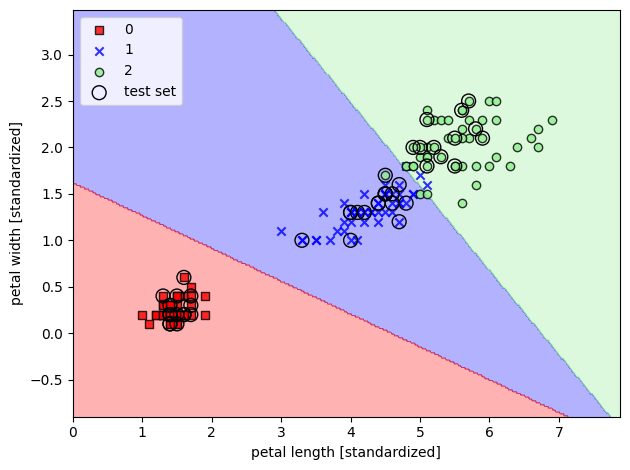

In [ ]:
from sklearn.linear_model import LogisticRegression
#from mlxtend.plotting import plot_decision_regions

# Function that will help us visualize the decision surfaces
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# combine the training and test datasets into a single dataset. This is done by vertically
# stacking (np.vstack) the feature matrices X_train and X_test and horizontally stacking
# (np.hstack) the corresponding target vectors y_train and y_test.
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# an instance of the logistic regression classifier (LogisticRegression) is created
lr = LogisticRegression(multi_class='auto', # the classifier should handle multi-class classification automatically
                        C=1e5,              # The C parameter is the inverse of the regularization strength (larger values indicate weaker regularization)
                        random_state=1)     # This sets a random seed for reproducibility

# trains the logistic regression model on the training data
lr.fit(X_train, y_train)

# the plot_decision_regions function is called to visualize the decision boundaries of the logistic regression classifier
plot_decision_regions(X_combined, # the combined feature matrix and target vector that include both training and test data
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150)) # an optional parameter that highlights the test samples by
                                                # specifying their indices (in this case, samples from index 105 to 149)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Learning Curves

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

If the training score is much greater than the validation score for the maximum number of training samples, adding more training samples will most likely increase generalization.

In [ ]:
################################## Define function that plots Learning Curves ##################################

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)): # np.linspace(.1, 1.0, 5) will return evenly
                                                                        # spaced 5 numbers from 0.1 to 1.0
                        # n_jobs is the number of CPUs to use to do the computation.
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """

    # Visualization patamters
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Estimate train and test score for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) # learning_curve Determines cross-validated
                                                                        # training and test scores for different
                                                                        # training set sizes.

    # Estimate statistics of train and test scores (mean, std)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    # Fill the area around the mean scores with standard deviation info
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # Fill for train set scores

    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")  # Fill for test set scores

    # Visualization parameters that will allow us to distinguish train set scores from test set scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

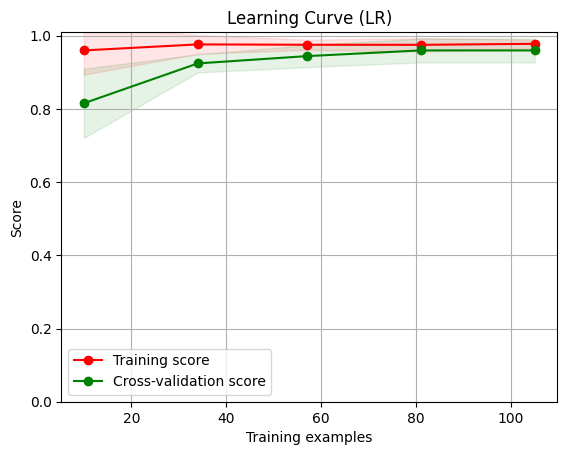

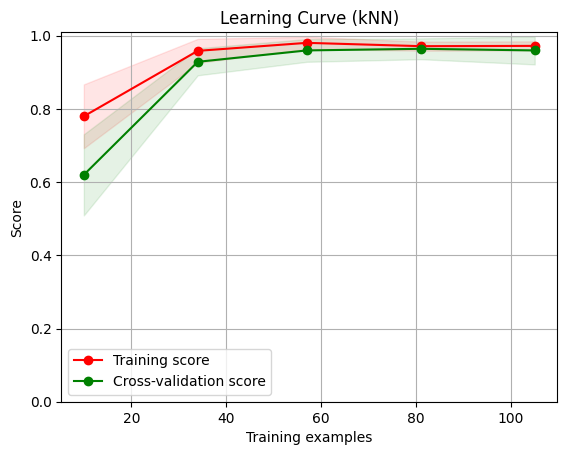

In [ ]:
###################################### Plot Learning Curves (LR and kNN) #######################################

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors

title = "Learning Curve (LR)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()

title = "Learning Curve (kNN)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = neighbors.KNeighborsClassifier() #n_neighbors=
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()




# Handling Categorical Variables

Machine learning models, including logistic regression, cannot work with categorical variables directly because they only process numerical data. One-hot encoding is a standard technique for converting categorical data into numerical form.

By using drop_first=True, we omit one category (low in this case). This is done to avoid perfect multicollinearity. If we encoded all the categories, we would end up with a situation where the columns are perfectly dependent on each other. For instance, knowing that income_high=0 and income_medium=0 would tell us that income_low=1. This results in a linear dependence, which causes problems in models like logistic regression.

The category that is omitted (low) becomes the baseline. The model interprets the effect of high and medium income relative to this baseline. In other words, the model will make comparisons of high and medium income against the low income category.

The model is evaluated using accuracy, though in some cases (e.g., imbalanced data), other metrics like precision, recall, or AUC-ROC might be more appropriate.


In [ ]:
######################################## Importing Libraries ########################################

import pandas as pd                                   #pandas is a powerful data manipulation library used to handle tabular data.
from sklearn.model_selection import train_test_split  #function from sklearn that splits the dataset into training and testing sets.
from sklearn.linear_model import LogisticRegression   #a logistic regression classifier from sklearn, which is used for classification tasks.
from sklearn.metrics import accuracy_score            #a function to compute the accuracy of the model’s predictions.

######################################## Creating the Dataset ########################################

# We simulate 1,000 samples with three features:
## age: A continuous feature generated from a normal distribution with a mean of 40 years and a standard deviation of 10.
## income: A continuous feature generated from a normal distribution with a mean income of $50,000 and a standard deviation of $15,000.
## education: A categorical feature with four levels (High School, Bachelor, Master, and PhD), where we set probabilities for each level
## (e.g., 40% of the population has only a high school education).

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Simulate continuous features (e.g., age, income)
age = np.random.normal(40, 10, n_samples).astype(int)  # Normal distribution with mean=40, std=10
income = np.random.normal(50000, 15000, n_samples).astype(int)  # Normal distribution with mean=50000, std=15000

# Simulate a categorical feature (e.g., education level)
education_levels = ['High School', 'Bachelor', 'Master', 'PhD']
education = np.random.choice(education_levels, size=n_samples, p=[0.4, 0.3, 0.2, 0.1])

# Binary target variable based on a rule (higher income and education lead to lower default rates)
# We introduce some noise to make it more realistic

# np.random.rand(n_samples) generates n_samples random numbers uniformly distributed between 0 and 1.
# These random values introduce noise or randomness to simulate real-world scenarios where outcomes are not deterministic
# (i.e., people with the same income and education may have different outcomes, so we add randomness).

# For each individual, the threshold (0.5 - 0.00001*income - 0.05*(education == 'PhD')) represents their default probability
# based on their income and education level.

# We then compare this threshold with a random number from np.random.rand(). If the random number is less than the threshold,
# the person is labeled as defaulting (1); otherwise, they are labeled as not defaulting (0).

# .astype(int) converts the resulting boolean array (which is True for people who default and False for those who don’t) into integers
defaulted = (np.random.rand(n_samples) < (0.5 - 0.00001*income - 0.05*(education == 'PhD'))).astype(int)

# Create a DataFrame
df = pd.DataFrame({
    'age': age,
    'income': income,
    'education': education,
    'defaulted': defaulted
})

print(df.head())

######################################## Handling Categorical Variables ########################################

#One-hot encoding is a process used to convert categorical variables into a set of binary (0 or 1) columns.
#Each unique category in the variable is turned into its own binary column.

# One-Hot Encoding with drop_first=True to omit one category
df_one_hot = pd.get_dummies(df, columns=['education'], drop_first=True)

print("One-Hot Encoded Data:")
print(df_one_hot.head()) # Note: True and False are internally treated as 1 and 0 when used in calculations or models.

##################################### Training the Logistic Regression Model #####################################

# Splitting the data into features and target variable
X = df_one_hot.drop(columns='defaulted')
y = df_one_hot['defaulted']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

##################################### Evaluating the Logistic Regression Model #####################################

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


   age  income    education  defaulted
0   44   70990     Bachelor          0
1   38   63869  High School          0
2   46   50894  High School          0
3   55   40295  High School          0
4   37   60473       Master          0
One-Hot Encoded Data:
   age  income  defaulted  education_High School  education_Master  \
0   44   70990          0                  False             False   
1   38   63869          0                   True             False   
2   46   50894          0                   True             False   
3   55   40295          0                   True             False   
4   37   60473          0                  False              True   

   education_PhD  
0          False  
1          False  
2          False  
3          False  
4          False  

Accuracy: 0.93
